**Dadasets used:** 
1. Breast cancer dataset
2. Wine classification dataset
3. Digits classification dataset
4. Iris plants database

**Algorithms implemented:**
1. KNN
2. Logistic Regression
3. Decision Tree
4. Random Forests
5. Neural Network
6. SVM

In [383]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np
import graphviz

In [384]:
# Select dataset
dataset = input("Enter name of dataset: \n1. Breast Cancer\n2. Wine\n3. Digits\n4. Iris\n")

datasetDict = {
  "Breast Cancer": load_breast_cancer(),
  "Wine": load_wine(),
  "Digits": load_digits(),
  "Iris": load_iris()
}
# load the available dataset and few EDA
data = datasetDict[dataset]

print(data.DESCR)

print(data.target_names)

print(data.data)

print(type(data.data))
print(data.data.shape)

Enter name of dataset: 
1. Breast Cancer
2. Wine
3. Digits
4. Iris
Iris
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ==

<font size=5>1. KNN classifier</font>

In [160]:
 X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, random_state=66)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1347, 64)
(1347,)
(450, 64)
(450,)


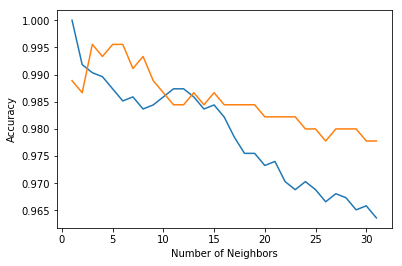

In [161]:
# try KNN for diffrent k nearest neighbor from 1 to 31
K = 31
neighbors_setting = list(range(1,K+1))

training_accuracy = []
test_accuracy = []

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# reshaping train and test accuracy    
training_accuracy = np.reshape(training_accuracy, (len(training_accuracy), 1))
test_accuracy = np.reshape(test_accuracy, (len(test_accuracy), 1))
    
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.show()

In [162]:
# find best K-NN 

errorDiff = {
  "Breast Cancer": 1e-2,
  "Wine": 3.1e-2,
  "Digits": 7.8e-4,
  "Iris": 1e-3
}

difference = 1*(abs(training_accuracy-test_accuracy) < errorDiff[dataset])
temp = max(test_accuracy*difference)
temp1 = test_accuracy*difference
index = list(temp1.tolist()).index(temp)

print("Accuracy of the training set for {}-NN: {:.3f} %" .format(index+1, 100*training_accuracy[index,0]))
print("Accuracy of the test set for {}-NN: {:.3f} %" .format(index+1, 100*test_accuracy[index,0]))

Accuracy of the training set for 10-NN: 98.589 %
Accuracy of the test set for 10-NN: 98.667 %


<font size=5>2. Logistic Regression</font>

In [163]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f} %'.format(100*log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f} %'.format(100*log_reg.score(X_test,y_test)))

Accuracy on the training set: 99.555 %
Accuracy on the test set: 96.444 %


For Breast cancer, Wine dataset, Logistic regression seems better than KNN. Whereas, for Iris database and Digits dataset, KNN is better.

<font size=5>3. Decision Tree</font>

In [228]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md, random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))

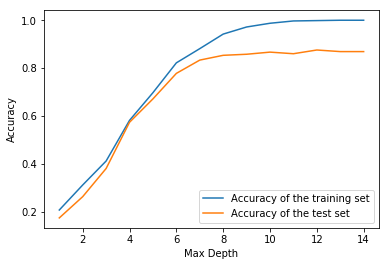

In [229]:
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

By having larger max_depth, we overfit the model for training dataset.

Therefore, other parameters than can work with:
- min_samples_leaf 
- max_sample_leaf
- max_leaf_node

In [233]:
# find the depth such that both accuracies are optimal

errorDiff = {
  "Breast Cancer": 1.4e-2,
  "Wine": 3.7e-2,
  "Digits": 8e-3,
  "Iris": 1e-6
}

training_accuracy = np.array(training_accuracy)
test_accuracy = np.array(test_accuracy)
print(training_accuracy)
print(test_accuracy)
difference = 1*(abs(training_accuracy-test_accuracy) < errorDiff[dataset])
print(abs(training_accuracy-test_accuracy))
print(difference)
temp = max(test_accuracy*difference)
print(temp)
temp1 = test_accuracy*difference
print(temp1)
index = list(temp1.tolist()).index(temp)
print(index)

print("Accuracy of the training set for depth at {}: {:.3f} %" .format(index+1, 100*training_accuracy[index]))
print("Accuracy of the test set for depth at {}: {:.3f} %" .format(index+1, 100*test_accuracy[index]))

[0.20638456 0.31106162 0.41128434 0.58129176 0.69710468 0.82182628
 0.88121752 0.94209354 0.97178916 0.98737936 0.99703044 0.99851522
 1.         1.        ]
[0.17333333 0.26222222 0.38       0.57333333 0.67111111 0.77777778
 0.83333333 0.85333333 0.85777778 0.86666667 0.86       0.87555556
 0.86888889 0.86888889]
[0.03305122 0.0488394  0.03128434 0.00795843 0.02599357 0.0440485
 0.04788419 0.08876021 0.11401138 0.12071269 0.13703044 0.12295966
 0.13111111 0.13111111]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0]
0.5733333333333334
[0.         0.         0.         0.57333333 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
3
Accuracy of the training set for depth at 4: 58.129 %
Accuracy of the test set for depth at 4: 57.333 %


By looking at plot, best result accurs when max_depth is at:
- Breast cancer = 3
- Wine = 3
- Iris = 6
- Digits = 4

<font size=5>4. Random Forests</font>

In [257]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

We can tune parameter such as:
- n_job 
- max_depth
- max_feature

In [258]:
print('Accuracy for training data: {:.3f} %'.format(100*forest.score(X_train,y_train)))
print('Accuracy for test data: {:.3f} %'.format(100*forest.score(X_test,y_test)))

Accuracy for training data: 100.000 %
Accuracy for test data: 97.556 %


For all the available datasets, Random Forest gives test accuracy around 97%.

<font size=5>5. Neural Network</font>

In [291]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('Accuracy for training data: {:.3f} %'.format(100*mlp.score(X_train, y_train)))
print('Accuracy for test data: {:.3f} %'.format(100*mlp.score(X_test, y_test)))

Accuracy for training data: 90.610 %
Accuracy for test data: 88.112 %


let's improve on NN
<font size=3>1) Scaling X data</font>

In [292]:
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('Accuracy for training data: {:.3f} %'.format(100*mlp.score(X_train_scaled, y_train)))
print('Accuracy for test data: {:.3f} %'.format(100*mlp.score(X_test_scaled, y_test)))

Accuracy for training data: 99.531 %
Accuracy for test data: 95.804 %


<font size=3>2) Change alpha</font>

In [293]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_scaled,y_train)
print('Accuracy for training data: {:.3f} %'.format(100*mlp.score(X_train_scaled, y_train)))
print('Accuracy for test data: {:.3f} %'.format(100*mlp.score(X_test_scaled, y_test)))

Accuracy for training data: 98.826 %
Accuracy for test data: 97.203 %


Test accuracy after improving the Neural Network,
- Breast Cancer: increased by 9-10%
- Wine: increased by almost 50%
- Iris: increased by just 3%
- Digits: increased by less than 1%

<font size=5>6. Support Vector Machine (SVM)</font>

In [385]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

svm= SVC()
svm.fit(X_train, y_train)

print('Accuracy on train dataset: {:.3f} %'.format(100*svm.score(X_train,y_train)))
print('Accuracy on test dataset: {:.3f} %'.format(100*svm.score(X_test,y_test)))


Accuracy on train dataset: 98.214 %
Accuracy on test dataset: 97.368 %


We can change hyper-parameters to improve the model,
- one way is to apply scaling

In [386]:
min_train = X_train.min(axis=0)

range_train = (X_train - min_train).max(axis=0)

for i in range(len(range_train)):
    if range_train[i] == 0.0:
        range_train[i] = 0.000001
    else:
        range_train[i] = range_train[i]

X_train_scaled = (X_train - min_train)/range_train
X_test_scaled = (X_test - min_train)/range_train

print('Min per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Max per feature\n{}'.format(X_train_scaled.max(axis=0)))

svm = SVC()
svm.fit(X_train_scaled, y_train)
print('Accuracy on train dataset: {:.3f} %'.format(100*svm.score(X_train_scaled,y_train)))
print('Accuracy on test dataset: {:.3f} %'.format(100*svm.score(X_test_scaled,y_test)))


Min per feature
[0. 0. 0. 0.]
Max per feature
[1. 1. 1. 1.]
Accuracy on train dataset: 94.643 %
Accuracy on test dataset: 97.368 %


We did much better now, but now we are underfitting. To fix it, we need to change hyper-parameters.

In [387]:
svm = SVC(C=1000)
svm.fit(X_train_scaled, y_train)
print('acc on train dataset: {:.3f} %'.format(100*svm.score(X_train_scaled,y_train)))
print('acc on test dataset: {:.3f} %'.format(100*svm.score(X_test_scaled,y_test)))

acc on train dataset: 99.107 %
acc on test dataset: 97.368 %
